como a renda mensal per capita e a quantidade de moradores em um domicilio afetam a seguranca alimentar de jovens (>18) por regiao?

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [4]:
dados2009 = pd.read_csv('DOM2009.csv')


In [5]:
dados09 = dados2009.loc[:,["UF","V0105","V4621","V4623","V2124","V2126","V2128","V2130","V2132","V2134","V2136"]]

dados09.head()

,UF,V0105,V4621,V4623,V2124,V2126,V2128,V2130,V2132,V2134,V2136
0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,7.0,118.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
3,11,3.0,1053.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1.0,930.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dados09 = dados09[dados09.V4623<=4]
dados09 = dados09[dados09.V4621 != 999999999999]

In [7]:
dados09 = dados09.rename(columns = {"V4621":"renda_mensal_per_capita"})


In [8]:

dados09.V2124 = dados09.V2124.astype("category")
dados09.V2124.cat.categories = (['Sim','Não'])
dados09.V2126 = dados09.V2126.astype("category")
dados09.V2126.cat.categories = (['Sim','Não'])
dados09.V2128 = dados09.V2128.astype("category")
dados09.V2128.cat.categories = (['Sim','Não'])
dados09.V2130 = dados09.V2130.astype("category")
dados09.V2130.cat.categories = (['Sim','Não'])
dados09.V2132 = dados09.V2132.astype("category")
dados09.V2132.cat.categories = (['Sim','Não'])
dados09.V2134 = dados09.V2134.astype("category")
dados09.V2134.cat.categories = (['Sim','Não'])
dados09.V2136 = dados09.V2136.astype("category")
dados09.V2136.cat.categories = (['Sim','Não'])
dados09.V4623 = dados09.V4623.astype("category")
dados09.V4623.cat.categories = (['boa','leve','moderada','grave'])







In [9]:
dados09 = dados09.rename(columns = {'V0105':'total_de_moradores',"V4623":"seguranca_alimentar" , "V2124":"deixou de ter alimentos saudaveis" , "V2126":"nao comeu suficiente","V2128":"diminiui quantidade de alimento","V2130":"deixou de fazer refeicao","V2132":"sentiu fome","V2134":"menos de uma refeicao/dia","V2136":"recebeu ajuda em alimentos"})
dados09.sort_values(by="seguranca_alimentar").head()





,UF,total_de_moradores,renda_mensal_per_capita,seguranca_alimentar,deixou de ter alimentos saudaveis,nao comeu suficiente,diminiui quantidade de alimento,deixou de fazer refeicao,sentiu fome,menos de uma refeicao/dia,recebeu ajuda em alimentos
153836,53,3.0,2500.0,boa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115915,41,4.0,585.0,boa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115909,41,5.0,386.0,boa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60128,29,4.0,140.0,boa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60130,29,2.0,45.0,boa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dados09.to_csv("resumo09.csv")

In [11]:
dados09sul = dados09[(dados09.UF == 41) | (dados09.UF == 42) | (dados09.UF == 43)]
dados09nordeste = dados09[(dados09.UF >= 21) & (dados09.UF <= 29)]
dados09norte = dados09[(dados09.UF <= 20)]
dados09sudeste = dados09[(dados09.UF >= 31) & (dados09.UF <= 35)]
dados09centrooeste = dados09[(dados09.UF>=50)]


In [12]:
list(dados09sudeste)

['UF',
 'total_de_moradores',
 'renda_mensal_per_capita',
 'seguranca_alimentar',
 'deixou de ter alimentos saudaveis',
 'nao comeu suficiente',
 'diminiui quantidade de alimento',
 'deixou de fazer refeicao',
 'sentiu fome',
 'menos de uma refeicao/dia',
 'recebeu ajuda em alimentos']

In [13]:
gsasudeste = dados09sudeste.seguranca_alimentar.value_counts(True)*100
gsasudeste




boa         70.355525
leve        21.494133
moderada     4.943651
grave        3.206692
Name: seguranca_alimentar, dtype: float64

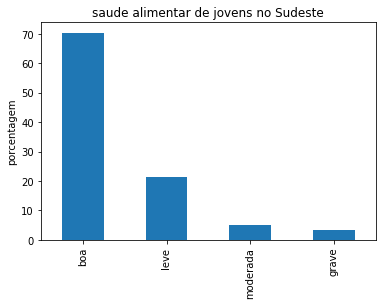

In [14]:
gsasudeste.plot(kind='bar')
plt.title("saude alimentar de jovens no Sudeste")
plt.ylabel("porcentagem")


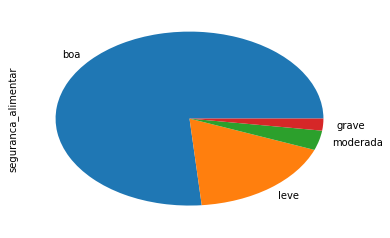

In [16]:
gsasul.plot(kind = 'pie')

In [17]:
dados09sudeste.renda_mensal_per_capita.describe()

count    17214.000000
mean       565.171546
std        848.828256
min          0.000000
25%        230.000000
50%        371.000000
75%        618.000000
max      50000.000000
Name: renda_mensal_per_capita, dtype: float64

In [18]:
faixa = range(0,5000,200)
RENDAsudeste = pd.cut(dados09sudeste.renda_mensal_per_capita, bins=faixa)
RENDAsudeste.value_counts(sort=False, normalize=True)*100

(0, 200]        20.653456
(200, 400]      34.253362
(400, 600]      19.497523
(600, 800]       9.235669
(800, 1000]      5.048360
(1000, 1200]     2.872140
(1200, 1400]     2.140835
(1400, 1600]     1.433121
(1600, 1800]     1.173626
(1800, 2000]     0.802076
(2000, 2200]     0.477707
(2200, 2400]     0.513093
(2400, 2600]     0.318471
(2600, 2800]     0.306676
(2800, 3000]     0.212314
(3000, 3200]     0.112055
(3200, 3400]     0.200519
(3400, 3600]     0.171031
(3600, 3800]     0.153338
(3800, 4000]     0.153338
(4000, 4200]     0.070771
(4200, 4400]     0.088464
(4400, 4600]     0.041283
(4600, 4800]     0.070771
Name: renda_mensal_per_capita, dtype: float64

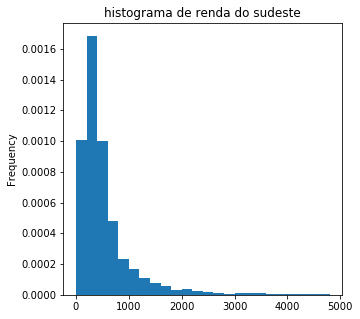

In [19]:
plotrendasudeste = dados09sudeste.renda_mensal_per_capita.plot.hist(bins=faixa,title='histograma de renda do sudeste',normed = 1,figsize=(5,5))



In [20]:
gmsudeste = dados09sudeste.total_de_moradores.value_counts()
gmsudeste

4.0     5923
3.0     5480
5.0     2832
6.0     1145
2.0      994
7.0      478
8.0      199
9.0       91
10.0      33
11.0      15
12.0      13
1.0        5
15.0       3
18.0       1
14.0       1
13.0       1
Name: total_de_moradores, dtype: int64

In [25]:

totalmoradores = pd.cut(dados09sudeste.total_de_moradores, bins=4)

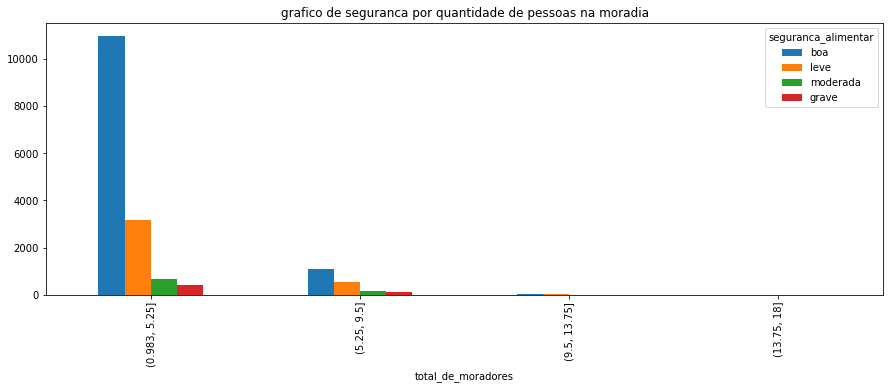

In [26]:
ct1sudeste = pd.crosstab( totalmoradores, dados09sudeste.seguranca_alimentar)
ct1sudeste.plot(kind='bar', figsize = (15,5))
plt.title('grafico de seguranca por quantidade de pessoas na moradia')

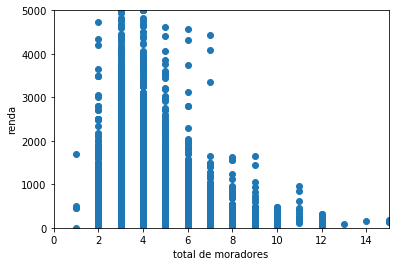

In [27]:
plt.scatter(dados09sudeste.total_de_moradores, dados09sudeste.renda_mensal_per_capita)
plt.axis([0,15,0,5000])
plt.ylabel('renda')
plt.xlabel('total de moradores')